In [4]:
#list of useful imports 
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

In [5]:
file_name = "train.zip"
import zipfile as zf
train_zip = zf.ZipFile(file_name)
train_zip.extractall()


In [6]:
!ls train

Black-grass               Common wheat              Scentless Mayweed
Charlock                  Fat Hen                   Shepherds Purse
Cleavers                  Loose Silky-bent          Small-flowered Cranesbill
Common Chickweed          Maize                     Sugar beet


In [16]:
#save the path into variable 
TRAin_DATA_FOLDER= "train"
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)
        

In [68]:
#number of all images
len(images)
print(images)


[[[[ 48  63  71]
   [ 26  45  43]
   [ 21  44  36]
   ...
   [ 70  90 106]
   [ 53  73  91]
   [ 55  75  96]]

  [[ 40  54  58]
   [ 20  39  36]
   [ 20  43  35]
   ...
   [ 83 102 119]
   [ 57  74  94]
   [ 62  80  99]]

  [[ 32  47  49]
   [ 28  49  45]
   [ 24  48  40]
   ...
   [ 84 100 119]
   [ 56  71  93]
   [ 61  76  97]]

  ...

  [[ 67  84 102]
   [ 70  86 105]
   [ 67  83 101]
   ...
   [ 34  51  70]
   [ 41  59  73]
   [ 37  54  68]]

  [[ 67  85 101]
   [ 72  89 105]
   [ 69  86 103]
   ...
   [ 38  54  72]
   [ 40  57  73]
   [ 37  54  70]]

  [[ 80  99 114]
   [ 74  92 107]
   [ 71  90 106]
   ...
   [ 39  55  72]
   [ 42  58  73]
   [ 37  54  71]]]


 [[[144 154 160]
   [144 154 160]
   [146 155 160]
   ...
   [202 197 193]
   [203 197 193]
   [205 195 192]]

  [[124 136 145]
   [125 137 146]
   [126 137 146]
   ...
   [203 196 192]
   [203 196 192]
   [203 194 191]]

  [[106 117 131]
   [100 112 126]
   [106 117 131]
   ...
   [202 196 192]
   [202 195 192]
   [205 197

In [18]:
#resizing images
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

In [19]:
#save resized images into images.
images = [resize_images(img) for img in images]

Text(0.5, 0.98, 'Categorical Plotting')

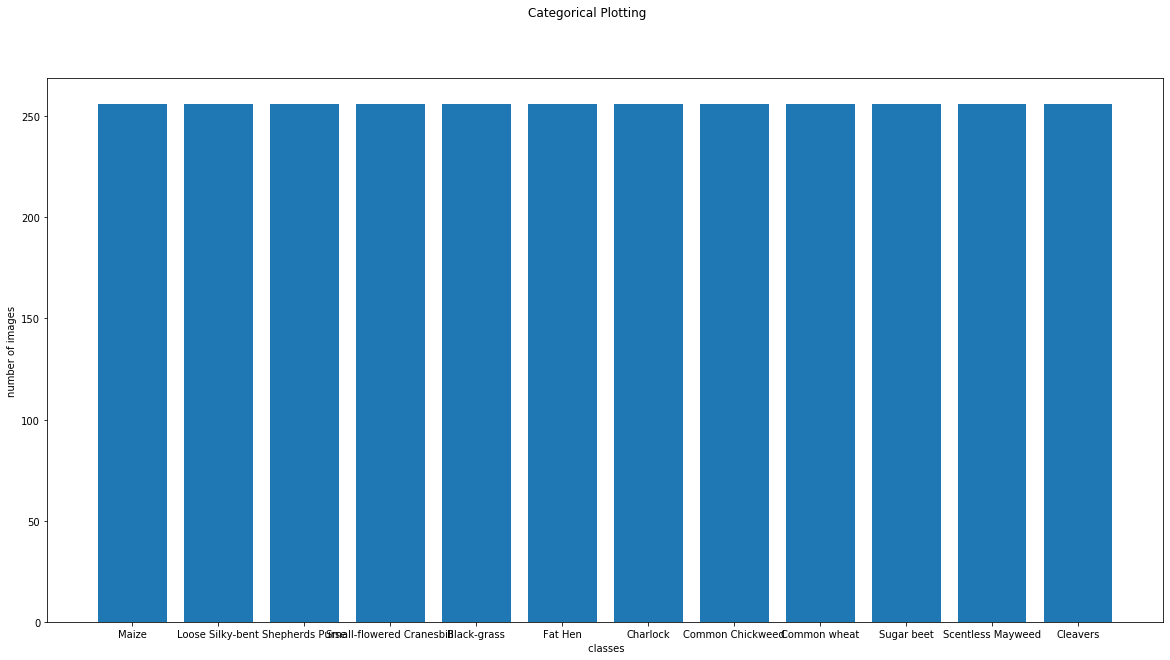

In [20]:
#plot the distrbution of number of imagesvalues =[]
labels=[]
values =[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
fig.suptitle('Categorical Plotting')

In [25]:
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
  
for label in set(classes):

  print("number of {} images is  -> {}".format(label, len(images[classes == label])))
        

images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Maize images is  -> 221
number of Loose Silky-bent images is  -> 654
number of Shepherds Purse images is  -> 231
number of Small-flowered Cranesbill images is  -> 496
number of Black-grass images is  -> 263
number of Fat Hen images is  -> 475
number of Charlock images is  -> 390
number of Common Chickweed images is  -> 611
number of Common wheat images is  -> 221
number of Sugar beet images is  -> 385
number of Scentless Mayweed images is  -> 516
number of Cleavers images is  -> 287


In [26]:
#Apply image processing on the images

#convert image from RGB to HSV
#Apply closing opration(one of mophological opration)
#Apply segmentation
#Apply sharpening

def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp


In [28]:
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

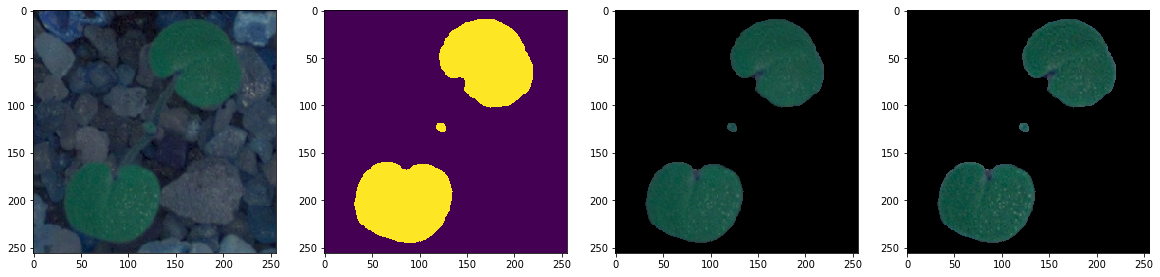

In [29]:
#plot sample image to see diffrence 
image = images[classes == "Small-flowered Cranesbill"][40]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

In [53]:
from sklearn import preprocessing
from keras.utils import to_categorical
import tensorflow
le = preprocessing.LabelEncoder()
le.fit(classes)

labels_encoded = le.transform(classes)

print("\n\nClasses: ", le.classes_)


# Convert labels into categorical values
y= to_categorical(labels_encoded)
print("\nNumber of One Hot encoded class labels: ", y.shape[1])



Classes:  ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']

Number of One Hot encoded class labels:  12


In [54]:
#splitting data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)


In [55]:
X_train.shape

(3325, 256, 256, 3)

In [56]:
#Create validation set
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [57]:
print(X_test.shape)
print(X_val.shape)

(712, 256, 256, 3)
(713, 256, 256, 3)


In [58]:
#CNN MODEL
import tensorflow
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 64)       

In [59]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)


Train on 3325 samples, validate on 713 samples
Epoch 1/50
3325/3325 [==============================] - 601s 181ms/step - loss: 3.2026 - accuracy: 0.1332 - val_loss: 2.4464 - val_accuracy: 0.1823
Epoch 2/50
3325/3325 [==============================] - 595s 179ms/step - loss: 2.4584 - accuracy: 0.1477 - val_loss: 2.4184 - val_accuracy: 0.2314
Epoch 3/50
3325/3325 [==============================] - 617s 186ms/step - loss: 2.2754 - accuracy: 0.2147 - val_loss: 2.2514 - val_accuracy: 0.2581
Epoch 4/50
3325/3325 [==============================] - 617s 185ms/step - loss: 2.1577 - accuracy: 0.2550 - val_loss: 2.1860 - val_accuracy: 0.2567
Epoch 5/50
3325/3325 [==============================] - 603s 181ms/step - loss: 2.0592 - accuracy: 0.2857 - val_loss: 2.1497 - val_accuracy: 0.2959
Epoch 6/50
3325/3325 [==============================] - 599s 180ms/step - loss: 1.9911 - accuracy: 0.3209 - val_loss: 2.0175 - val_accuracy: 0.3394
Epoch 7/50
3325/3325 [==============================] - 615s 185

In [60]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5918110939726401
Test accuracy: 0.8160112500190735


In [61]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

# With data augmentation to prevent 

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [62]:
X_train, X_test, y_train, y_test
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 604s - loss: 0.5177 - accuracy: 0.8269 - val_loss: 0.4560 - val_accuracy: 0.8626
Epoch 2/30
 - 573s - loss: 0.5399 - accuracy: 0.8141 - val_loss: 0.4990 - val_accuracy: 0.8401
Epoch 3/30
 - 577s - loss: 0.5393 - accuracy: 0.8158 - val_loss: 0.5336 - val_accuracy: 0.8261
Epoch 4/30
 - 572s - loss: 0.5362 - accuracy: 0.8155 - val_loss: 0.4641 - val_accuracy: 0.8471

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/30
 - 578s - loss: 0.3756 - accuracy: 0.8722 - val_loss: 0.4609 - val_accuracy: 0.8443
Epoch 6/30
 - 577s - loss: 0.3465 - accuracy: 0.8740 - val_loss: 0.4352 - val_accuracy: 0.8541
Epoch 7/30
 - 578s - loss: 0.3348 - accuracy: 0.8786 - val_loss: 0.4751 - val_accuracy: 0.8289

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 8/30
 - 590s - loss: 0.3106 - accuracy: 0.8887 - val_loss: 0.4115 - val_accuracy: 0.8640
Epoch 9/30
 - 600s - loss: 0.2725 - accuracy: 0.8938 - val_loss: 0.4407 - val_

In [63]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = None)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4301540049609174
Test accuracy: 0.8637640476226807


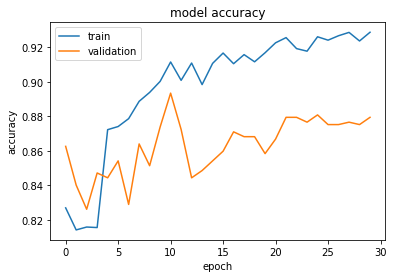

In [64]:
#show plot
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left') 

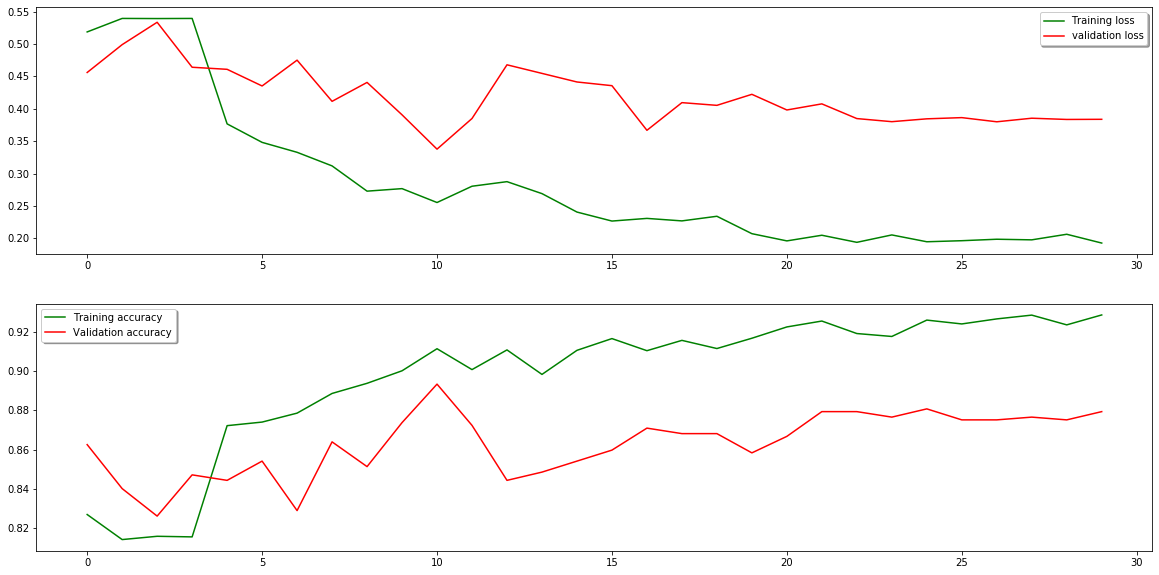

In [65]:
fig, ax = plt.subplots(2,1 , figsize=(20,10))
ax[0].plot(history.history['loss'], color='g', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='g', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [67]:
from glob import glob
test_path='test/*.png'
test_file_data = glob(test_path)

test_data= []
test_class = []
j = 1
num = len(test_file_data)

# Obtain images and resizing, obtain labels
for img in test_file_data:
    print("Obtain images: " + str(j) + "/" + str(num), end='\r')
    test_class.append(img.split('/')[-1])  # Images id's
    test_data.append(cv2.imread(img))
    j += 1

test_data = np.asarray(test_data)  # Train images set

print(test_data)

[array([[[ 30,  62,  87],
        [ 32,  61,  86],
        [ 36,  61,  86],
        ...,
        [107, 118, 125],
        [106, 118, 124],
        [107, 118, 125]],

       [[ 34,  63,  84],
        [ 36,  62,  83],
        [ 40,  62,  84],
        ...,
        [101, 110, 119],
        [104, 114, 121],
        [114, 124, 131]],

       [[ 46,  71,  90],
        [ 39,  64,  83],
        [ 39,  62,  82],
        ...,
        [ 78,  86, 100],
        [ 90,  99, 109],
        [104, 113, 122]],

       ...,

       [[ 40,  64,  89],
        [ 39,  62,  86],
        [ 45,  67,  90],
        ...,
        [ 55,  76, 100],
        [ 55,  76, 100],
        [ 56,  77, 101]],

       [[ 41,  65,  87],
        [ 42,  65,  86],
        [ 43,  65,  87],
        ...,
        [ 53,  74,  98],
        [ 55,  76, 100],
        [ 56,  77, 100]],

       [[ 44,  68,  87],
        [ 45,  68,  88],
        [ 47,  70,  89],
        ...,
        [ 58,  79, 102],
        [ 58,  79, 101],
        [ 59,  80, 102]

In [74]:
#resizing images
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

In [75]:
#save resized images into images.
test_data = [resize_images(img) for img in test_data]

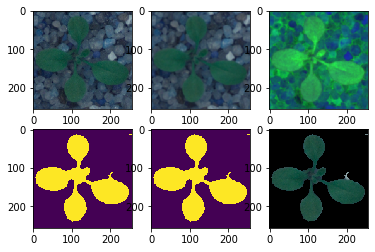

In [77]:
clearTestImg = []
examples = []; getEx = True
for img in test_data:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTestImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTestImg = np.asarray(clearTestImg)

In [84]:
clearTestImg = clearTestImg / 255

In [85]:
pred = model.predict(clearTestImg)

In [81]:
predNum = np.argmax(pred, axis=1)
predStr = le.classes_[predNum]

res = {'file': test_class, 'species': predStr}
res = pd.DataFrame(res)
res.to_csv("res.csv", index=False)